# PROYECTO CIENCIA DE DATOS  
## INTEGRANTES:  
    Carlos Stiven Ruiz  
    Jhonny fernando duque   
    Santiago Reyes


## PUNTO 1
### EXPLORACIÓN Y ANÁLISIS DESCRIPTIVO

IMPORTAMOS LIBRERIAS PARA EL PROYECTO


In [92]:
import pandas as pd
import seaborn as sns
import kagglehub
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# CARGAMOS EL DATASET

In [93]:
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### Eliminación de la columna Unnamed

In [94]:
df = df.drop(columns=['Unnamed: 0'])

In [95]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [96]:
df.describe()
print(df.dtypes)

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object


In [97]:
df.select_dtypes('number')

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018


#### Para entender un poco mejor los datos haremos varios histogramas relacionados a cada columna de nuestro dataset

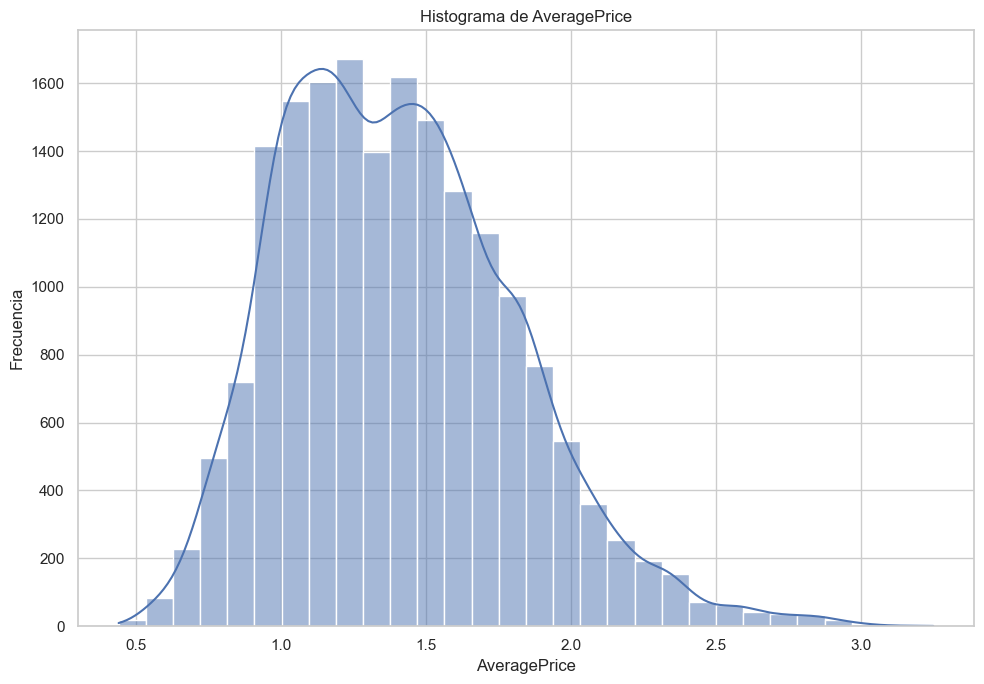

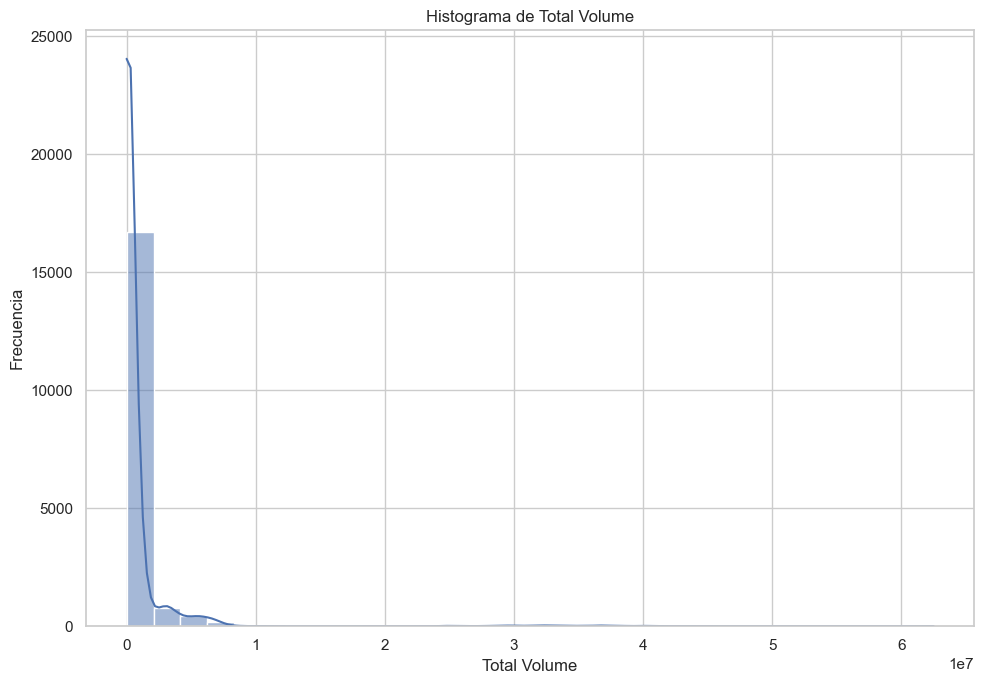

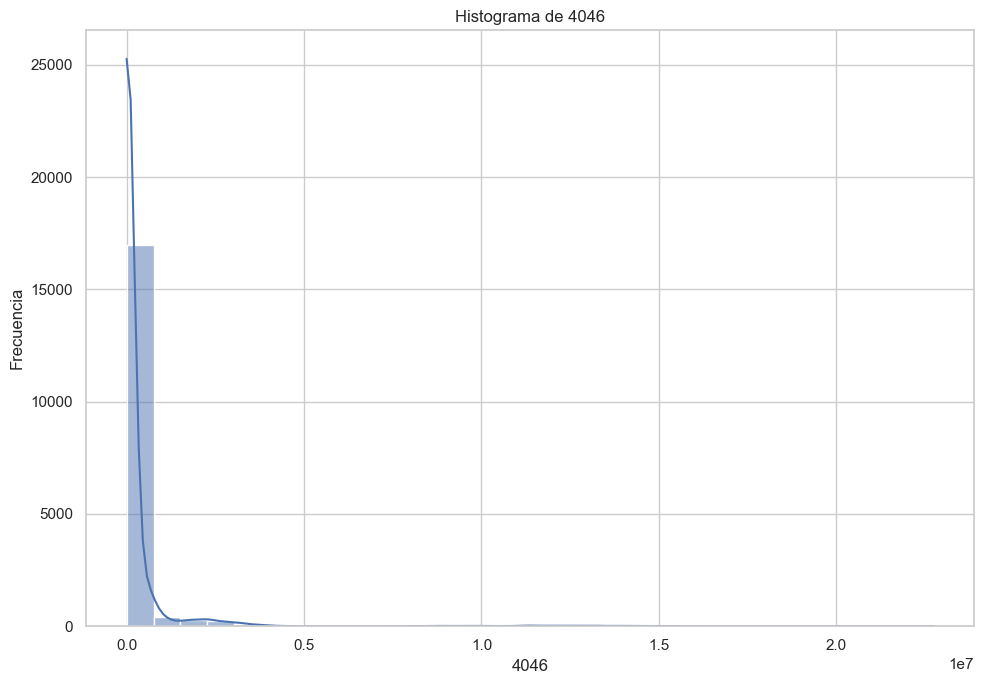

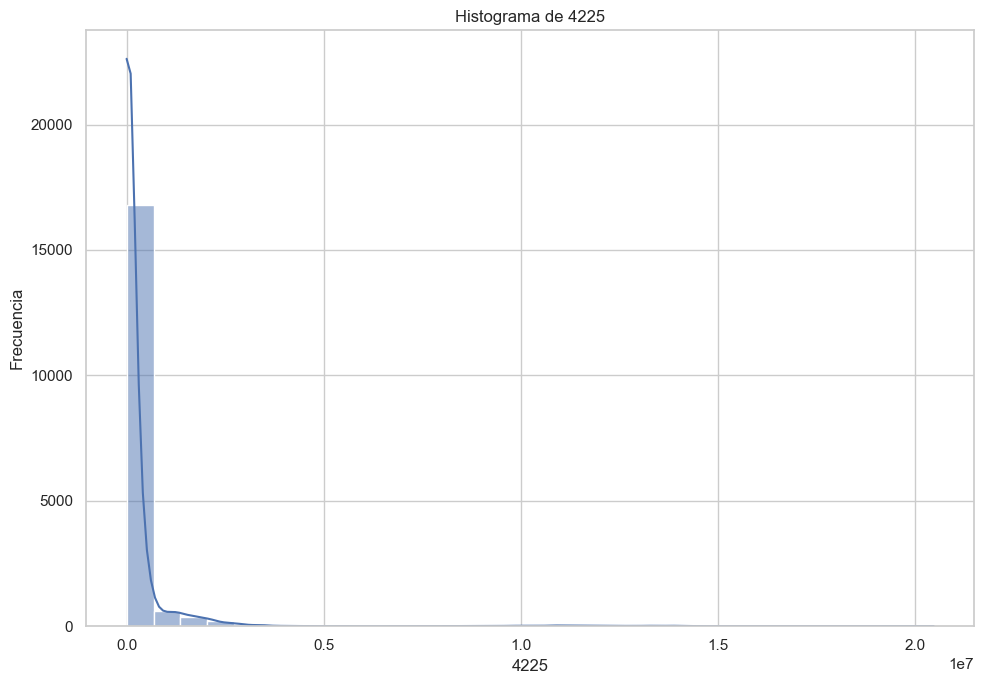

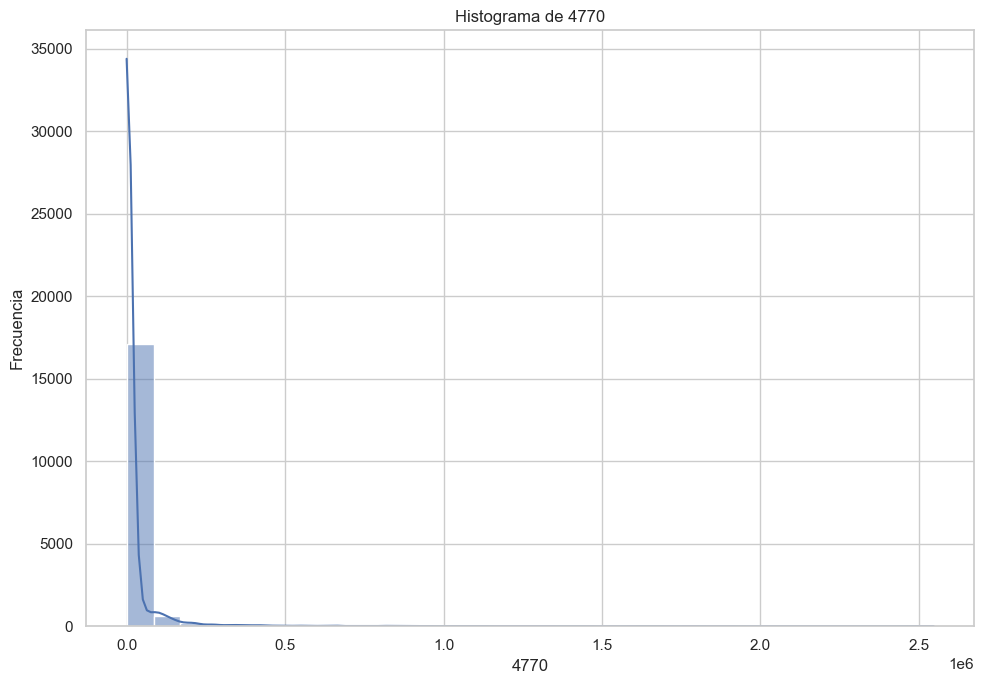

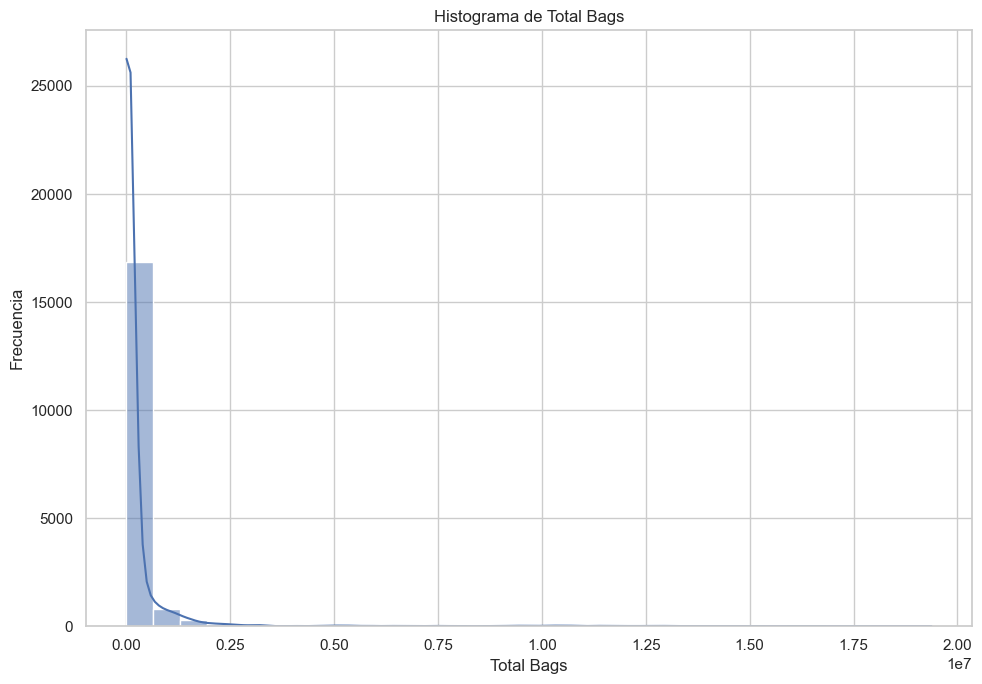

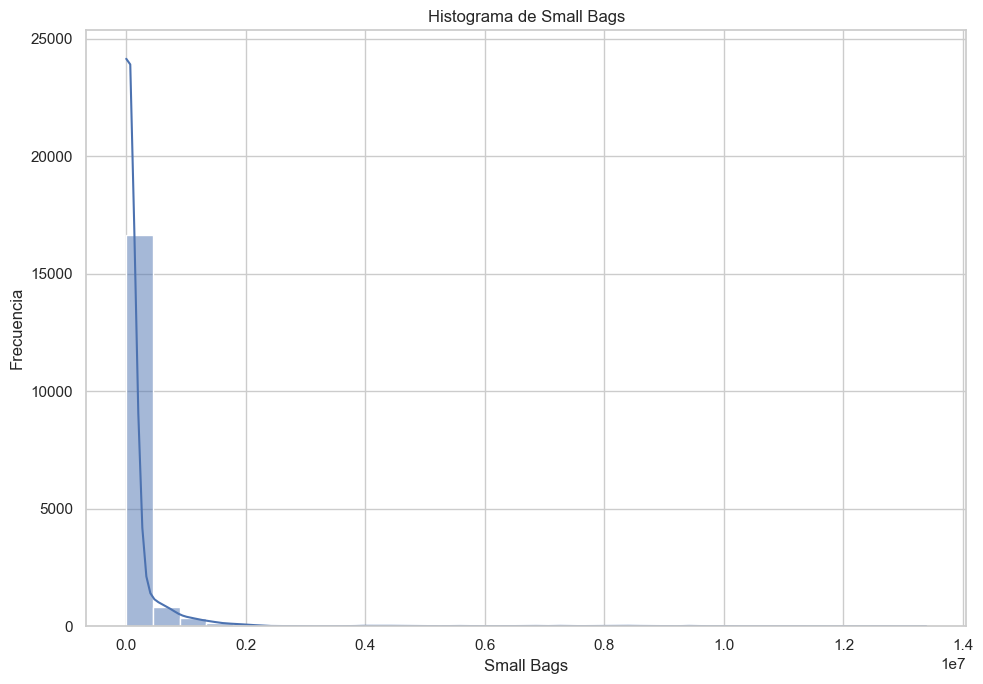

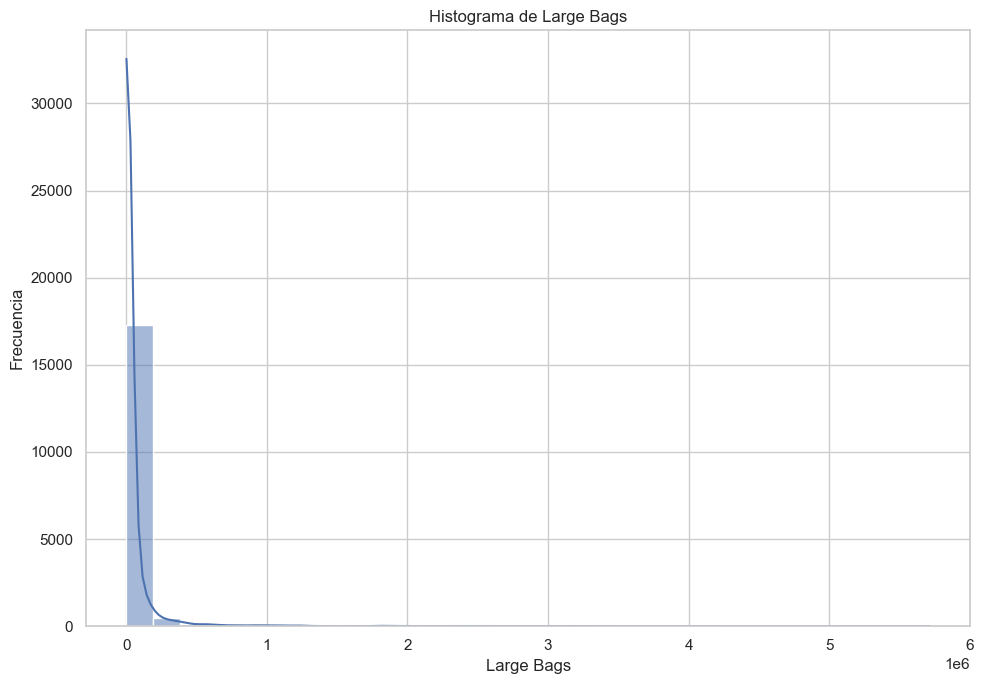

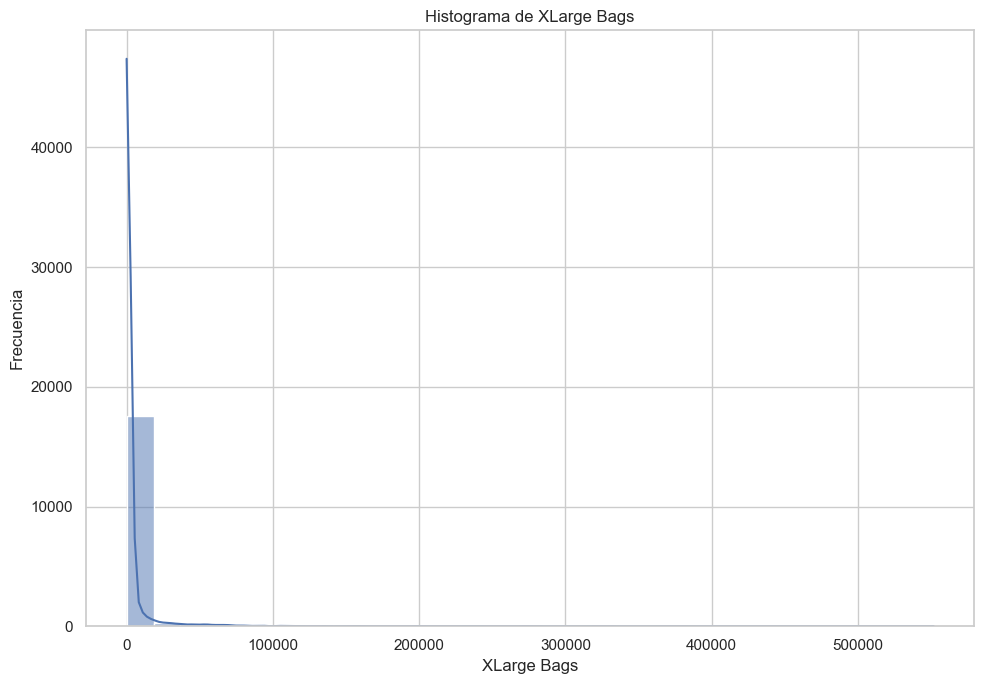

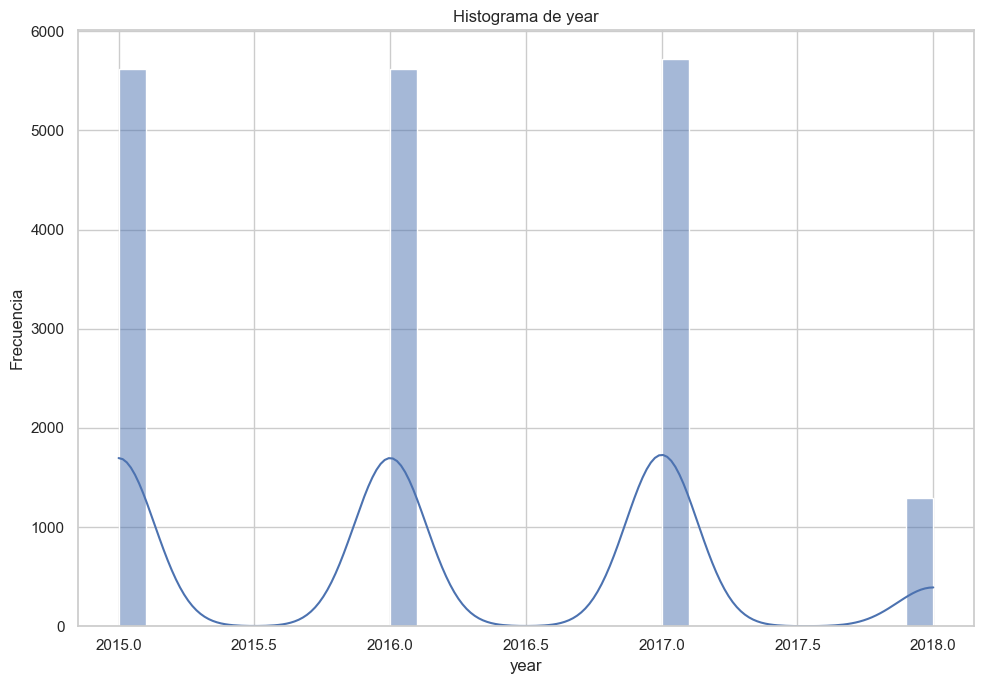

In [98]:
variables_numericas = df.select_dtypes(include='number').columns

for col in variables_numericas:
    plt.figure(figsize=(10, 7))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

### Conclusiones de los histogramas:

1. **Distribución de precios promedio (`AveragePrice`)**:
    - La mayoría de los precios promedio se concentran en un rango específico, lo que indica que los precios no varían drásticamente.
    - Hay una ligera asimetría, lo que podría sugerir la presencia de precios más altos en algunos casos.

2. **Volumen total (`Total Volume`)**:
    - La distribución está sesgada hacia la izquierda, lo que indica que la mayoría de los datos tienen volúmenes bajos, pero hay algunos valores extremos con volúmenes muy altos.

3. **Ventas por PLU (`4046`, `4225`, `4770`)**:
    - Las distribuciones de estas variables muestran que la mayoría de las ventas están concentradas en valores bajos, con algunos valores atípicos que representan ventas significativamente altas.
    - Esto sugiere que ciertos productos específicos tienen una mayor demanda en comparación con otros.

4. **Bolsas totales (`Total Bags`) y tipos de bolsas (`Small Bags`, `Large Bags`, `XLarge Bags`)**:
    - La mayoría de las ventas de bolsas están concentradas en valores bajos, con una distribución similar a las ventas por PLU.
    - Las bolsas pequeñas (`Small Bags`) parecen ser las más utilizadas, mientras que las bolsas extra grandes (`XLarge Bags`) tienen una menor frecuencia.

5. **Año (`year`)**:
    - La variable `year` tiene una distribución uniforme, ya que representa datos de diferentes años sin sesgo.

En general, los histogramas muestran que la mayoría de las variables tienen distribuciones sesgadas hacia la izquierda, lo que indica la presencia de valores extremos o atípicos en el dataset. Esto podría ser relevante para el análisis y modelado, ya que los valores extremos pueden influir en los resultados.


In [99]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### Visualizamos cuantas regiones hay disponibles

In [100]:
(df['region'].unique())

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

#### Podemos apreciar que el ordenamiento es por semanas, concretamente de domingo a domingo

In [101]:
sorted(df['Date'].unique())

['2015-01-04',
 '2015-01-11',
 '2015-01-18',
 '2015-01-25',
 '2015-02-01',
 '2015-02-08',
 '2015-02-15',
 '2015-02-22',
 '2015-03-01',
 '2015-03-08',
 '2015-03-15',
 '2015-03-22',
 '2015-03-29',
 '2015-04-05',
 '2015-04-12',
 '2015-04-19',
 '2015-04-26',
 '2015-05-03',
 '2015-05-10',
 '2015-05-17',
 '2015-05-24',
 '2015-05-31',
 '2015-06-07',
 '2015-06-14',
 '2015-06-21',
 '2015-06-28',
 '2015-07-05',
 '2015-07-12',
 '2015-07-19',
 '2015-07-26',
 '2015-08-02',
 '2015-08-09',
 '2015-08-16',
 '2015-08-23',
 '2015-08-30',
 '2015-09-06',
 '2015-09-13',
 '2015-09-20',
 '2015-09-27',
 '2015-10-04',
 '2015-10-11',
 '2015-10-18',
 '2015-10-25',
 '2015-11-01',
 '2015-11-08',
 '2015-11-15',
 '2015-11-22',
 '2015-11-29',
 '2015-12-06',
 '2015-12-13',
 '2015-12-20',
 '2015-12-27',
 '2016-01-03',
 '2016-01-10',
 '2016-01-17',
 '2016-01-24',
 '2016-01-31',
 '2016-02-07',
 '2016-02-14',
 '2016-02-21',
 '2016-02-28',
 '2016-03-06',
 '2016-03-13',
 '2016-03-20',
 '2016-03-27',
 '2016-04-03',
 '2016-04-

## Promedio general de las 5 regiones más caras

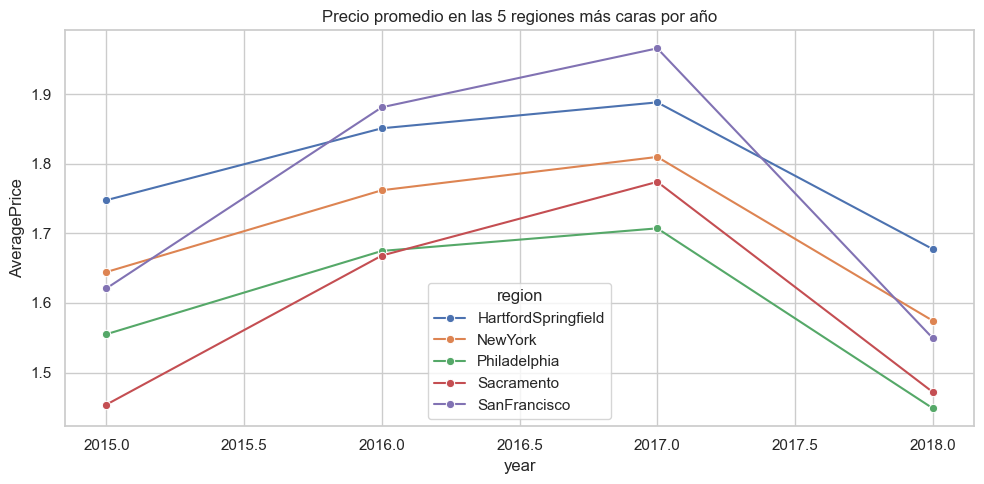

In [102]:
top_regions = df.groupby('region')['AveragePrice'].mean().sort_values(ascending=False).head(5).index

subset = df[df['region'].isin(top_regions)]
grouped = subset.groupby(['region', 'year'])['AveragePrice'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped, x='year', y='AveragePrice', hue='region', marker='o')
plt.title('Precio promedio en las 5 regiones más caras por año')
plt.tight_layout()
plt.show()


El gráfico de promedio de las 5 regiones más caras por año muestra las siguientes observaciones:

1. **Variación entre regiones**:
    - Las regiones seleccionadas tienen un promedio de precios significativamente más alto en comparación con otras regiones.
    - Esto indica que estas regiones tienen un mercado más costoso para los aguacates.

2. **Tendencia a lo largo de los años**:
    - En general, se observa una ligera variación en los precios promedio a lo largo de los años.
    - Algunas regiones muestran un aumento constante en los precios, mientras que otras tienen fluctuaciones.

3. **Comparación entre regiones**:
    - Aunque todas las regiones tienen precios altos, hay diferencias notables entre ellas.
    - Algunas regiones, como `HartfordSpringfield` y `SanFrancisco`, parecen tener precios consistentemente más altos.

4. **Impacto de factores externos**:
    - Las fluctuaciones en los precios podrían estar influenciadas por factores externos como la demanda, la oferta, o eventos económicos específicos de cada región.

En resumen, el gráfico destaca las diferencias en los precios promedio de aguacates en las regiones más caras, mostrando tendencias y variaciones que podrían ser útiles para análisis de mercado o estrategias de negocio.


## Promedio general de las 5 regiones más baratas

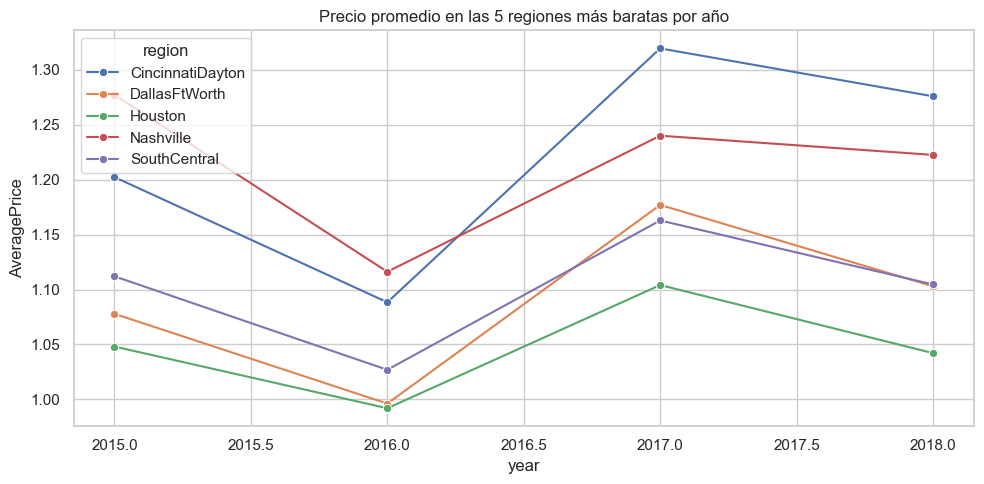

In [103]:
lower_regions = df.groupby('region')['AveragePrice'].mean().sort_values(ascending=True).head(5).index

subset = df[df['region'].isin(lower_regions)]
grouped = subset.groupby(['region', 'year'])['AveragePrice'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped, x='year', y='AveragePrice', hue='region', marker='o')
plt.title('Precio promedio en las 5 regiones más baratas por año')
plt.tight_layout()
plt.show()


### Conclusiones del gráfico de promedio en las 5 regiones más baratas por año:

1. **Variación entre regiones**:
    - Las regiones seleccionadas tienen un promedio de precios consistentemente más bajo en comparación con otras regiones.
    - Esto indica que estas regiones tienen mercados más económicos para los aguacates.

2. **Tendencia a lo largo de los años**:
    - En general, se observa una ligera variación en los precios promedio a lo largo de los años.
    - Algunas regiones muestran una tendencia estable, mientras que otras presentan fluctuaciones.

3. **Comparación entre regiones**:
    - Aunque todas las regiones tienen precios bajos, hay diferencias notables entre ellas.
    - Algunas regiones, como `Houston` y `DallasFtWorth`, parecen tener precios consistentemente más bajos.

4. **Impacto de factores externos**:
    - Las fluctuaciones en los precios podrían estar influenciadas por factores externos como la oferta, la demanda o eventos económicos específicos de cada región.

En resumen, el gráfico destaca las diferencias en los precios promedio de aguacates en las regiones más económicas, mostrando tendencias y variaciones que podrían ser útiles para análisis de mercado o estrategias de negocio.

In [104]:
(df['region'])

df[df['region'] == 'TotalUS']

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2652,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS
2653,2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS
2654,2015-12-13,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,conventional,2015,TotalUS
2655,2015-12-06,0.89,28800396.57,9405464.36,12160838.62,931830.63,6302262.96,5005077.36,1233956.21,63229.39,conventional,2015,TotalUS
2656,2015-11-29,0.99,22617999.38,8094803.56,9003178.41,731008.41,4789009.00,3901953.04,856560.34,30495.62,conventional,2015,TotalUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18220,2018-02-04,1.53,1384683.41,117922.52,287724.61,1703.52,977084.84,774695.74,201878.69,510.41,organic,2018,TotalUS
18221,2018-01-28,1.61,1336979.09,118616.17,280080.34,1270.61,936859.49,796104.27,140652.84,102.38,organic,2018,TotalUS
18222,2018-01-21,1.63,1283987.65,108705.28,259172.13,1490.02,914409.26,710654.40,203526.59,228.27,organic,2018,TotalUS
18223,2018-01-14,1.59,1476651.08,145680.62,323669.83,1580.01,1005593.78,858772.69,146808.97,12.12,organic,2018,TotalUS


## Proporción de ventas entre aguacuate a granel y en bolsitas

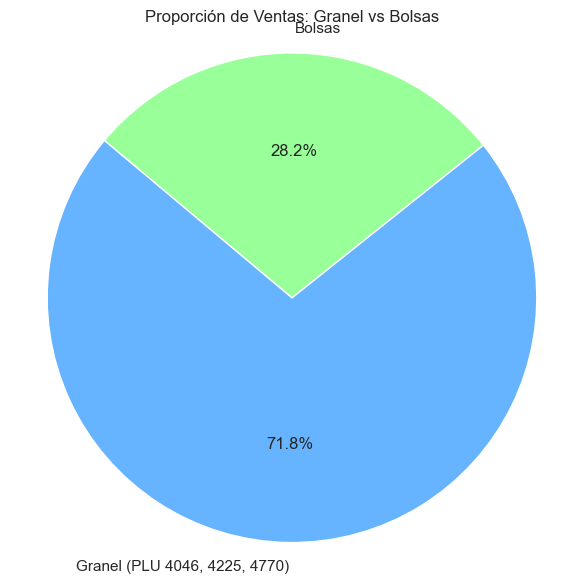

In [105]:
granel_total = df['4046'].sum() + df['4225'].sum() + df['4770'].sum()
bolsas_total = df['Total Bags'].sum()

valores = [granel_total, bolsas_total]
etiquetas = ['Granel (PLU 4046, 4225, 4770)', 'Bolsas']

plt.figure(figsize=(6, 6))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plt.title('Proporción de Ventas: Granel vs Bolsas')
plt.axis('equal') 
plt.tight_layout()
plt.show()


El gráfico de proporción de ventas entre aguacates a granel y en bolsas muestra las siguientes observaciones:

1. **Distribución de ventas**:
    - La mayor parte de las ventas corresponde a aguacates a granel, representando aproximadamente el 72% del total.
    - Las ventas en bolsas representan el 28% restante.

2. **Preferencia del mercado**:
    - Esto sugiere que los consumidores prefieren comprar aguacates a granel en lugar de en bolsas, posiblemente debido a la flexibilidad en la cantidad que pueden adquirir.

3. **Impacto en la logística**:
    - Las ventas a granel podrían implicar un manejo más directo y menos empaquetado, mientras que las ventas en bolsas podrían estar orientadas a mercados específicos o consumidores que buscan conveniencia.

En resumen, el gráfico destaca una clara preferencia por los aguacates a granel, lo que podría influir en estrategias de marketing, empaquetado y distribución.

## Proporción en ventas entre agucate a granel y en bolsitas de las diez regiones con más ventas

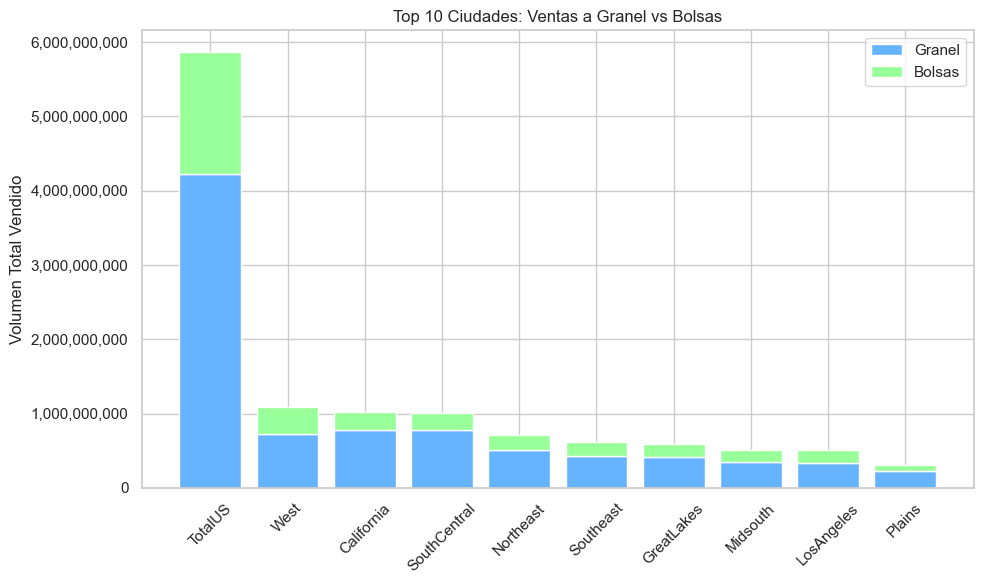

In [106]:
ventas_por_region = df.groupby('region').agg({
    '4046': 'sum',
    '4225': 'sum',
    '4770': 'sum',
    'Total Bags': 'sum'
}).reset_index()

ventas_por_region['Granel'] = ventas_por_region['4046'] + ventas_por_region['4225'] + ventas_por_region['4770']
ventas_por_region['Bolsas'] = ventas_por_region['Total Bags']

ventas_por_region['Total'] = ventas_por_region['Granel'] + ventas_por_region['Bolsas']

top10 = ventas_por_region.sort_values(by='Total', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top10['region'], top10['Granel'], label='Granel', color='#66b3ff')
plt.bar(top10['region'], top10['Bolsas'], bottom=top10['Granel'], label='Bolsas', color='#99ff99')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.xticks(rotation=45)
plt.ylabel('Volumen Total Vendido')
plt.title('Top 10 Ciudades: Ventas a Granel vs Bolsas')
plt.legend()
plt.tight_layout()
plt.show()


### Se valida que TotalUS sea una región y no la suma de las demás regiones

In [107]:
region_sums = df.groupby('region')[['Total Volume', '4046', '4225', '4770', 'Total Bags']].sum()

total_us_data = region_sums.loc['TotalUS']
other_regions_sum = region_sums.drop('TotalUS').sum()

print("TotalUS:")
print(total_us_data)

print("\nSuma de las otras regiones:")
print(other_regions_sum)

print("\nDiferencias entre TotalUS y la suma de las otras regiones:")
print(total_us_data - other_regions_sum)



TotalUS:
Total Volume    5.864740e+09
4046            2.054936e+09
4225            2.015012e+09
4770            1.561752e+08
Total Bags      1.638601e+09
Name: TotalUS, dtype: float64

Suma de las otras regiones:
Total Volume    9.658662e+09
4046            3.292175e+09
4225            3.371264e+09
4770            2.606272e+08
Total Bags      2.734575e+09
dtype: float64

Diferencias entre TotalUS y la suma de las otras regiones:
Total Volume   -3.793922e+09
4046           -1.237238e+09
4225           -1.356253e+09
4770           -1.044520e+08
Total Bags     -1.095974e+09
dtype: float64


## Cantidad de ventas unitarias totales por PLU (en millones)

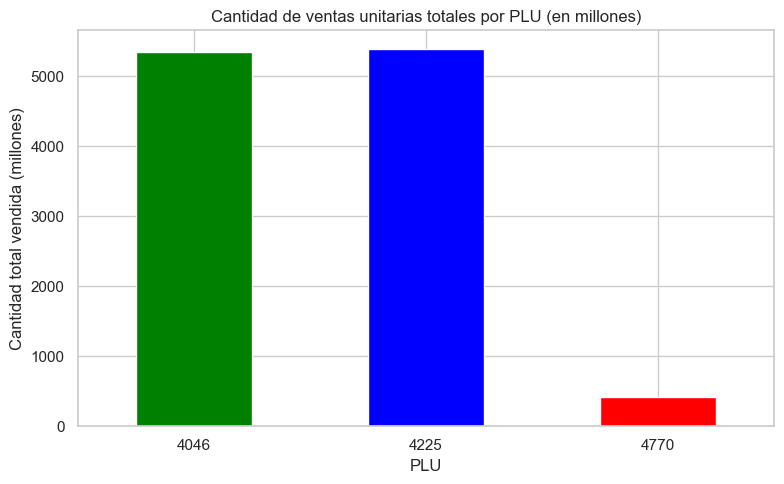

4046    5347.110739
4225    5386.275718
4770     416.802342
dtype: float64


In [108]:
plu_sales = df[['4046', '4225', '4770']].sum()

plu_sales_scaled = plu_sales / 1e6

plt.figure(figsize=(8, 5))
plu_sales_scaled.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Cantidad de ventas unitarias totales por PLU (en millones)')
plt.xlabel('PLU')
plt.ylabel('Cantidad total vendida (millones)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(plu_sales_scaled)


## Tipo de aguacate más vendido

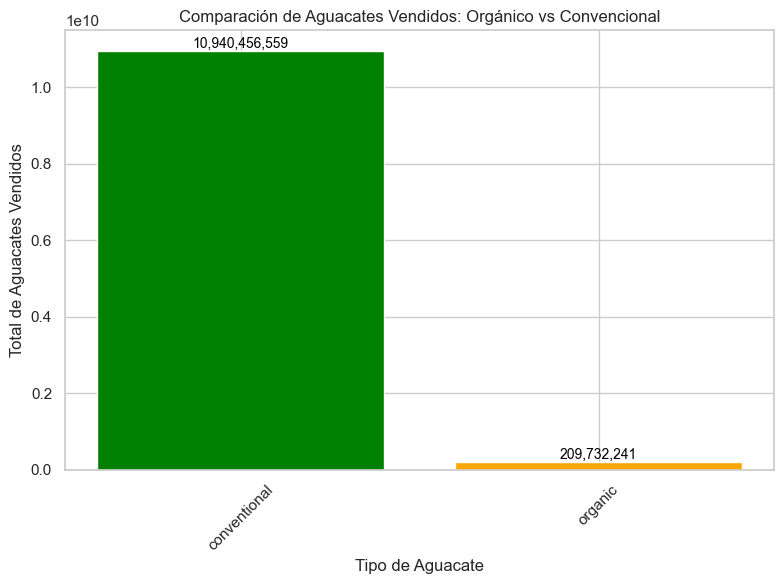

In [109]:
ventas_por_tipo = df.groupby('type').agg({
    '4046': 'sum',
    '4225': 'sum', 
    '4770': 'sum',  
    'Total Bags': 'sum'  
}).reset_index()

ventas_por_tipo['Total_Aguacates'] = ventas_por_tipo['4046'] + ventas_por_tipo['4225'] + ventas_por_tipo['4770']

plt.figure(figsize=(8, 6))
bars = plt.bar(ventas_por_tipo['type'], ventas_por_tipo['Total_Aguacates'], color=['green', 'orange'])

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{bar.get_height():,.0f}', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.title('Comparación de Aguacates Vendidos: Orgánico vs Convencional')
plt.xlabel('Tipo de Aguacate')
plt.ylabel('Total de Aguacates Vendidos')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


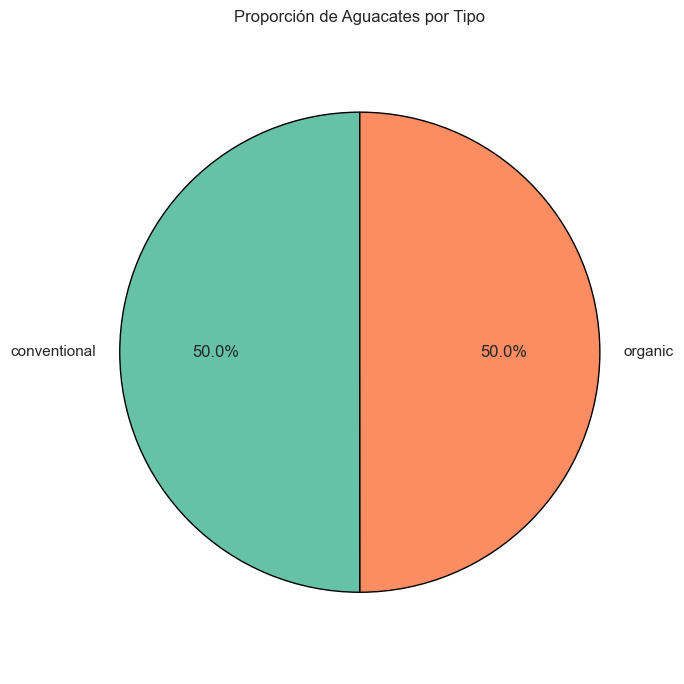

In [110]:
sns.set(style="whitegrid")

# Conteo por tipo en porcentaje
conteo_tipo = df['type'].value_counts(normalize=True) * 100

# Colores de Seaborn
colors = sns.color_palette("Set2")

# Gráfico de torta
plt.figure(figsize=(7, 7))
plt.pie(
    conteo_tipo,
    labels=conteo_tipo.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Proporción de Aguacates por Tipo')
plt.axis('equal') 

plt.tight_layout()
plt.show()

### Violin Plot con la distribución de los precios de aguacate en base a su tipo

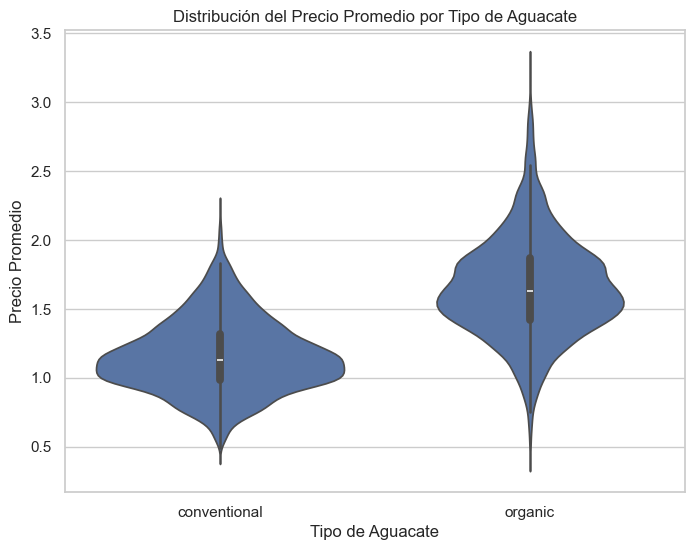

In [111]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='type', y='AveragePrice', data=df)
plt.title('Distribución del Precio Promedio por Tipo de Aguacate')
plt.xlabel('Tipo de Aguacate')
plt.ylabel('Precio Promedio')
plt.show()


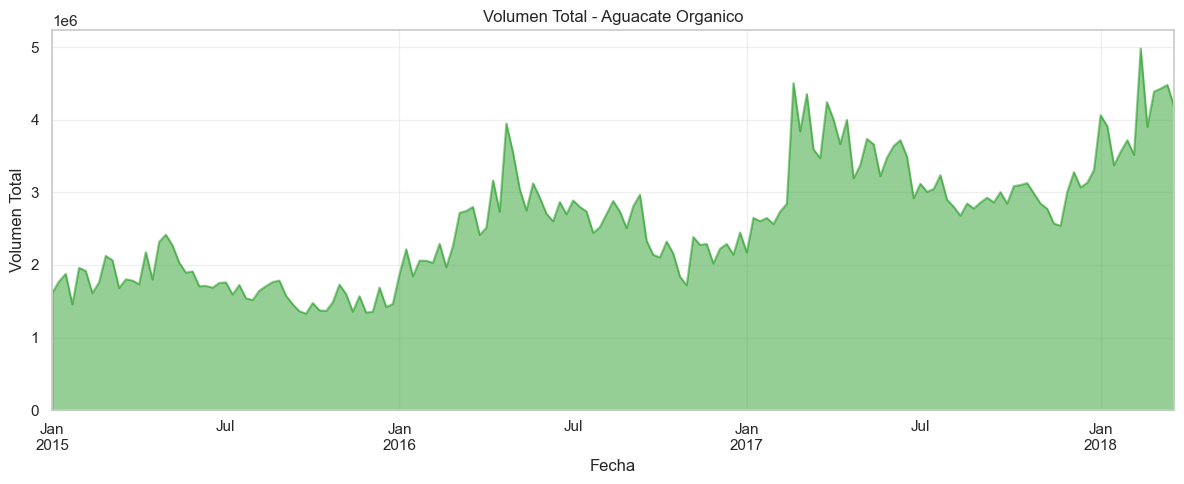

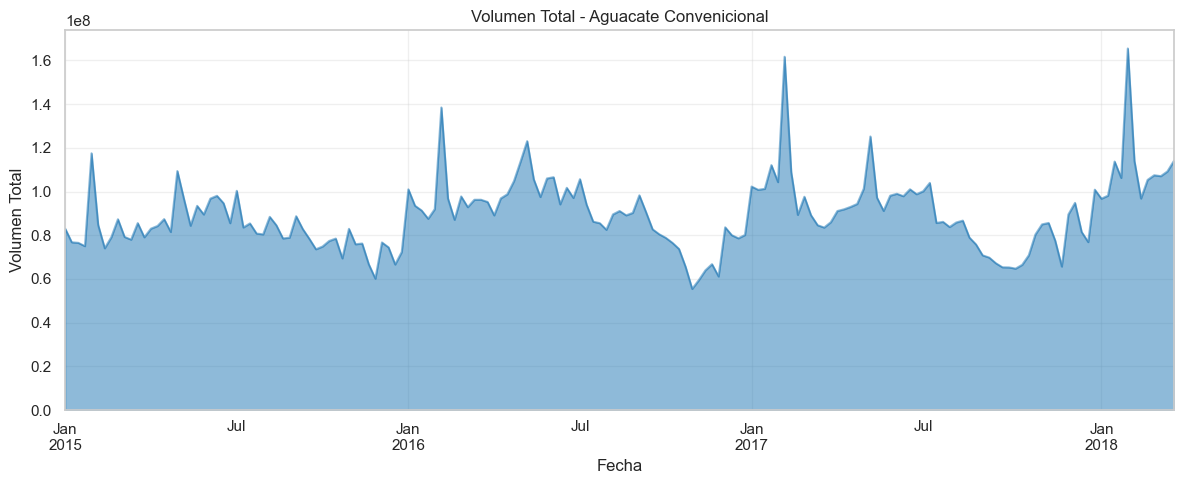

In [112]:
# Recreate the 'Date' column
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 5))
df_org = df[df['type'] == 'organic']
df_org.groupby('Date')['Total Volume'].sum().plot(kind='area', stacked=False, color='#2ca02c')
plt.title('Volumen Total - Aguacate Organico')
plt.xlabel('Fecha')
plt.ylabel('Volumen Total')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
df_conv = df[df['type'] == 'conventional']
df_conv.groupby('Date')['Total Volume'].sum().plot(kind='area', stacked=False, color='#1f77b4')
plt.title('Volumen Total - Aguacate Convenicional')
plt.xlabel('Fecha')
plt.ylabel('Volumen Total')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [113]:
df.select_dtypes(include='number')

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018


## Implementación de los bloxplot para visualizar los valores atípicos del dataset

<Figure size 1800x1200 with 0 Axes>

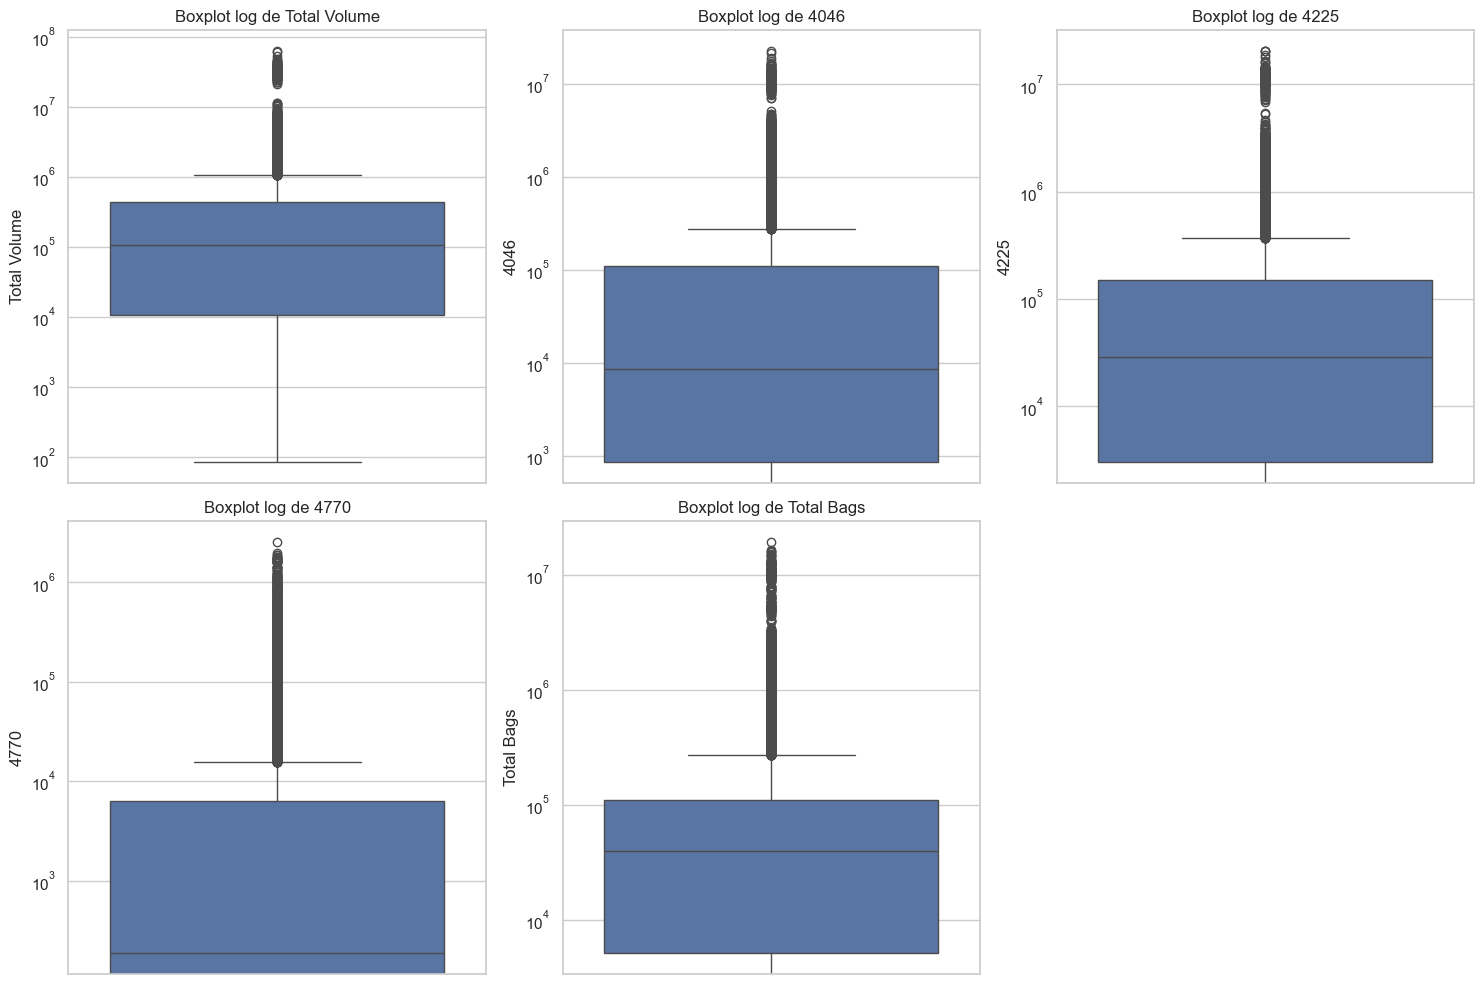

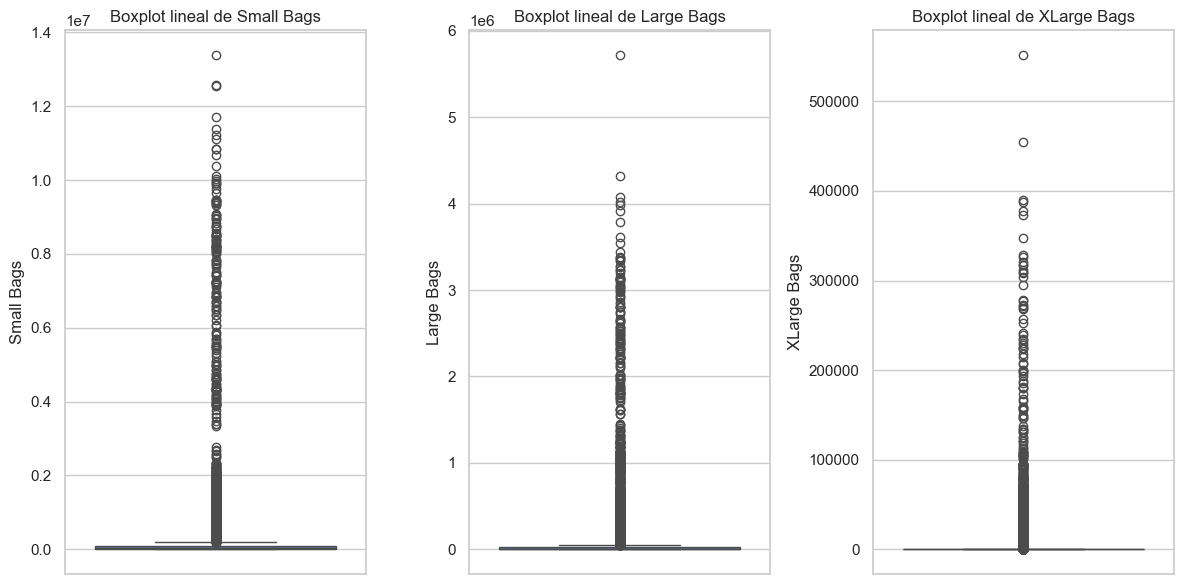

In [114]:
col_log = ['Total Volume', '4046', '4225', '4770', 'Total Bags']
col_linear = ['Small Bags', 'Large Bags', 'XLarge Bags']


plt.figure(figsize=(18, 12))

# Log scale
plt.figure(figsize=(15, 10))
for i, col in enumerate(col_log, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col)
    plt.yscale('log')
    plt.title(f'Boxplot log de {col}')
plt.tight_layout()
plt.show()

# Linear scale
plt.figure(figsize=(12, 6))
for i, col in enumerate(col_linear, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot lineal de {col}')
plt.tight_layout()
plt.show()


### **Boxplots con escala logarítmica**
1. **`Total Volume` y PLUs (`4046`, `4225`, `4770`)**:
    - Estas variables presentan una gran cantidad de valores atípicos (outliers) en la parte superior de la distribución.
    - La escala logarítmica ayuda a visualizar mejor la dispersión de los datos y a identificar los valores extremos.
    - Los valores atípicos sugieren que hay regiones o semanas con volúmenes de ventas significativamente mayores que el promedio.

2. **`Total Bags` y tipos de bolsas (`Small Bags`, `Large Bags`, `XLarge Bags`)**:
    - Similar a las PLUs, estas variables también muestran valores atípicos en la parte superior.
    - Las bolsas pequeñas (`Small Bags`) tienen una mayor concentración de datos en comparación con las bolsas grandes y extra grandes, lo que indica que son las más utilizadas.

### **Boxplots con escala lineal**
1. **`Small Bags`, `Large Bags`, `XLarge Bags`**:
    - En la escala lineal, se observa que las bolsas pequeñas tienen una distribución más amplia, mientras que las bolsas grandes y extra grandes tienen valores más concentrados y menos dispersión.
    - Las bolsas extra grandes (`XLarge Bags`) tienen valores significativamente más bajos en comparación con las otras categorías.

### **Conclusiones generales**:
- **Presencia de valores atípicos**:
  - Los valores atípicos son comunes en las variables relacionadas con volúmenes de ventas y bolsas. Esto podría deberse a eventos específicos, como promociones o temporadas altas de ventas.
  - Es importante considerar estos valores atípicos en el análisis, ya que pueden influir en los resultados de los modelos.

- **Distribución de los datos**:
  - La mayoría de las variables tienen distribuciones sesgadas hacia la izquierda, con una gran cantidad de valores bajos y unos pocos valores altos.
  - Esto sugiere que la mayoría de las regiones o semanas tienen volúmenes de ventas moderados, mientras que unas pocas tienen volúmenes excepcionalmente altos.

  

# PUNTO 2
## Limpieza y normalización de los datos

### Revisión de valores nulos

In [115]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### Descartando valores nulos mediante gráficas 

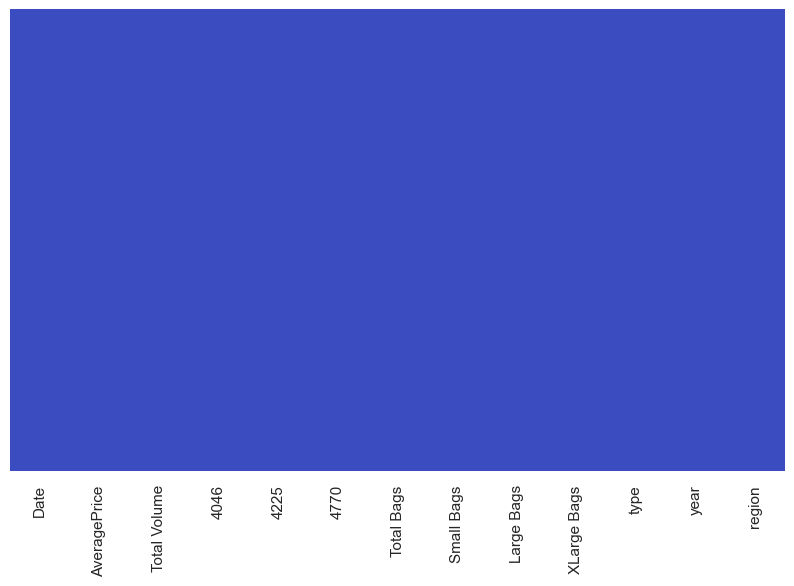

In [116]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='coolwarm', cbar=False, yticklabels=False)
plt.show()

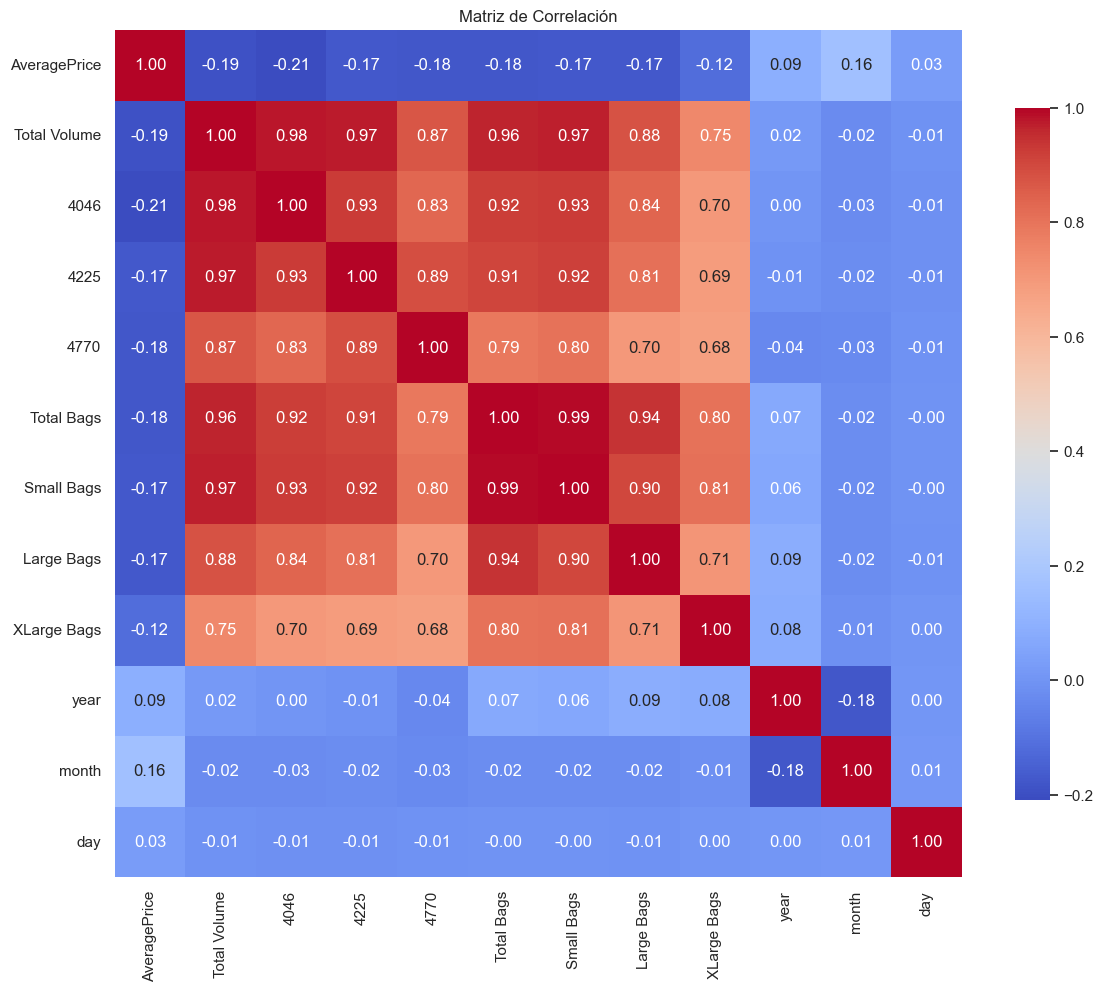

In [117]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

df = df.drop('Date', axis=1)

variables_numericas = df.select_dtypes(include='number').columns
corr_matrix = df[variables_numericas].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()


## Extraemos las variables numericas del dataframe y eliminamos las fechas 

In [118]:
df_reduced = df[['AveragePrice', '4770', '4225', 'Large Bags', 'XLarge Bags', 'year', 'Small Bags', 'month', 'day']]
corr_matrix = df_reduced.corr()

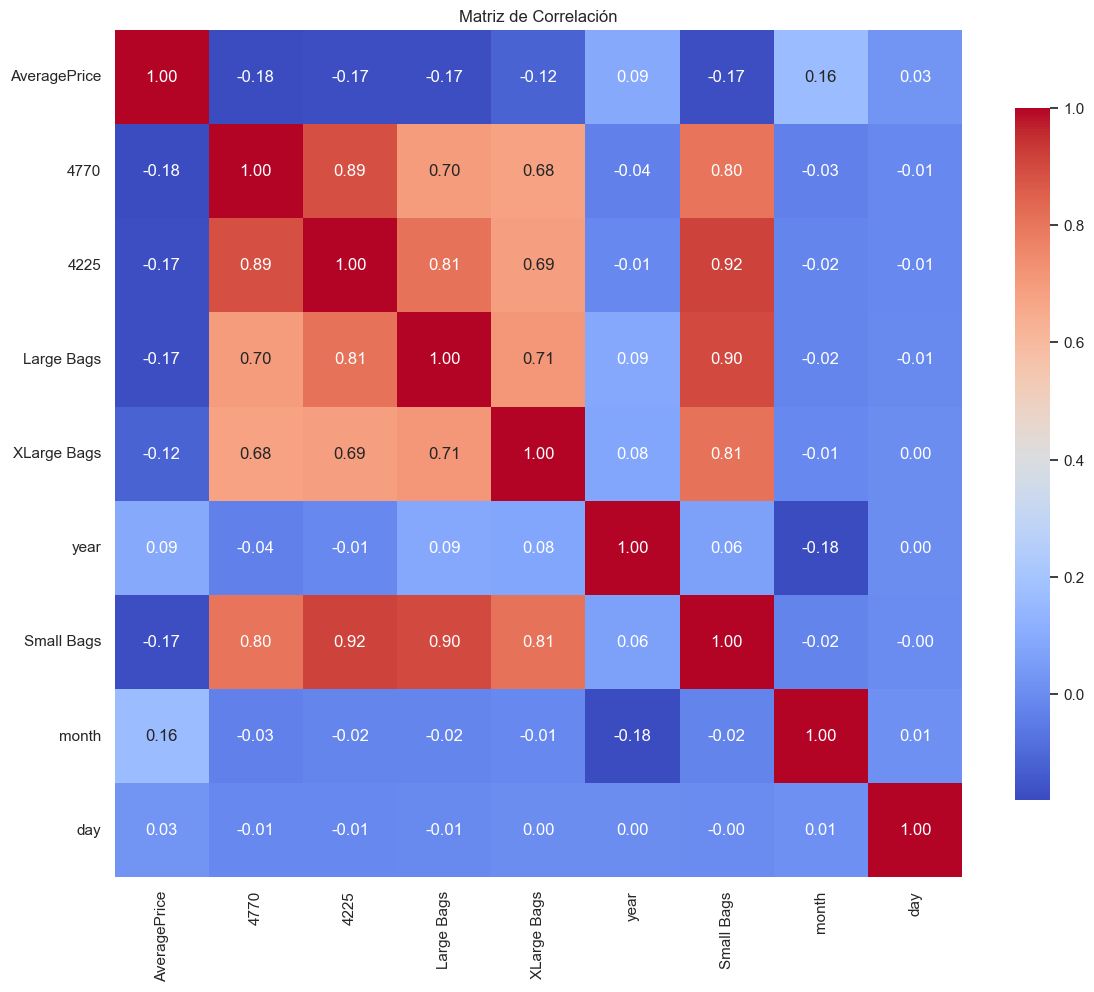

In [119]:

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

# Aplicar Z-score

In [120]:
# Copia del DataFrame reducido
df_zscore = df_reduced.copy()

# Selecciona solo las columnas numéricas para aplicar zscore
numericas = df_zscore.select_dtypes(include='number').columns

# Aplica zscore solo a esas columnas
df_zscore[numericas] = df_zscore[numericas].transform(zscore)

In [121]:
# Umbral para detectar valores atípicos
umbral = 3

# Detectar outliers: filas con al menos un valor z-score > 4 o < -4
outliers = df_zscore[(df_zscore[numericas].abs() > umbral).any(axis=1)]
print("Cantidad de outliers:", len(outliers))

# (Opcional) Ver los outliers
print(outliers)

# Crear nuevo DataFrame sin outliers
df_limpio = df_reduced[(df_zscore[numericas].abs() <= umbral).all(axis=1)].copy()
df_limpio

Cantidad de outliers: 592
       AveragePrice      4770      4225  Large Bags  XLarge Bags      year  \
780       -0.983393  2.156968  0.927386    0.180616     4.294451 -1.221282   
781       -0.983393  2.035535  0.865593    0.281446     3.263235 -1.221282   
783       -1.008227  3.494109  1.150612    0.286803     2.684548 -1.221282   
787       -1.057896  3.744638  1.245382    0.343595     2.750882 -1.221282   
788       -1.008227  3.404611  1.270969    0.322733     2.414674 -1.221282   
...             ...       ...       ...         ...          ...       ...   
17302      3.486818 -0.212355 -0.243137   -0.216169    -0.175580  0.906575   
17303      3.561322 -0.212439 -0.242719   -0.220906    -0.175580  0.906575   
17304      3.064632 -0.212372 -0.242731   -0.218781    -0.175580  0.906575   
17402      3.213639 -0.212540 -0.244579   -0.219591    -0.175580  0.906575   
17428      4.380861 -0.212540 -0.245059   -0.222167    -0.175580  0.906575   

       Small Bags     month       day

,AveragePrice,4770,4225,Large Bags,XLarge Bags,year,Small Bags,month,day
0,1.33,48.16,54454.85,93.25,0.0,2015,8603.62,12,27
1,1.35,58.33,44638.81,97.49,0.0,2015,9408.07,12,20
2,0.93,130.50,109149.67,103.14,0.0,2015,8042.21,12,13
3,1.08,72.58,71976.41,133.76,0.0,2015,5677.40,12,6
4,1.28,75.78,43838.39,197.69,0.0,2015,5986.26,11,29
...,...,...,...,...,...,...,...,...,...
18244,1.63,0.00,1529.20,431.85,0.0,2018,13066.82,2,4
18245,1.71,0.00,3431.50,324.80,0.0,2018,8940.04,1,28
18246,1.87,727.94,2452.79,42.31,0.0,2018,9351.80,1,21
18247,1.93,727.01,2981.04,50.00,0.0,2018,10919.54,1,14


In [122]:
# Paso 5: Mostrar resultados
print(f'Número de filas eliminadas: {df.shape[0] - df_limpio.shape[0]}')
print(f'Número de filas restantes: {df_limpio.shape[0]}')
print(f"Porcentaje de filas eliminadas: {100 * (df.shape[0] - df_limpio.shape[0]) / df.shape[0]:.2f}%")

Número de filas eliminadas: 592
Número de filas restantes: 17657
Porcentaje de filas eliminadas: 3.24%


## Ahora haremos graficas de caja con el dataframe limpio para comparar con el original 

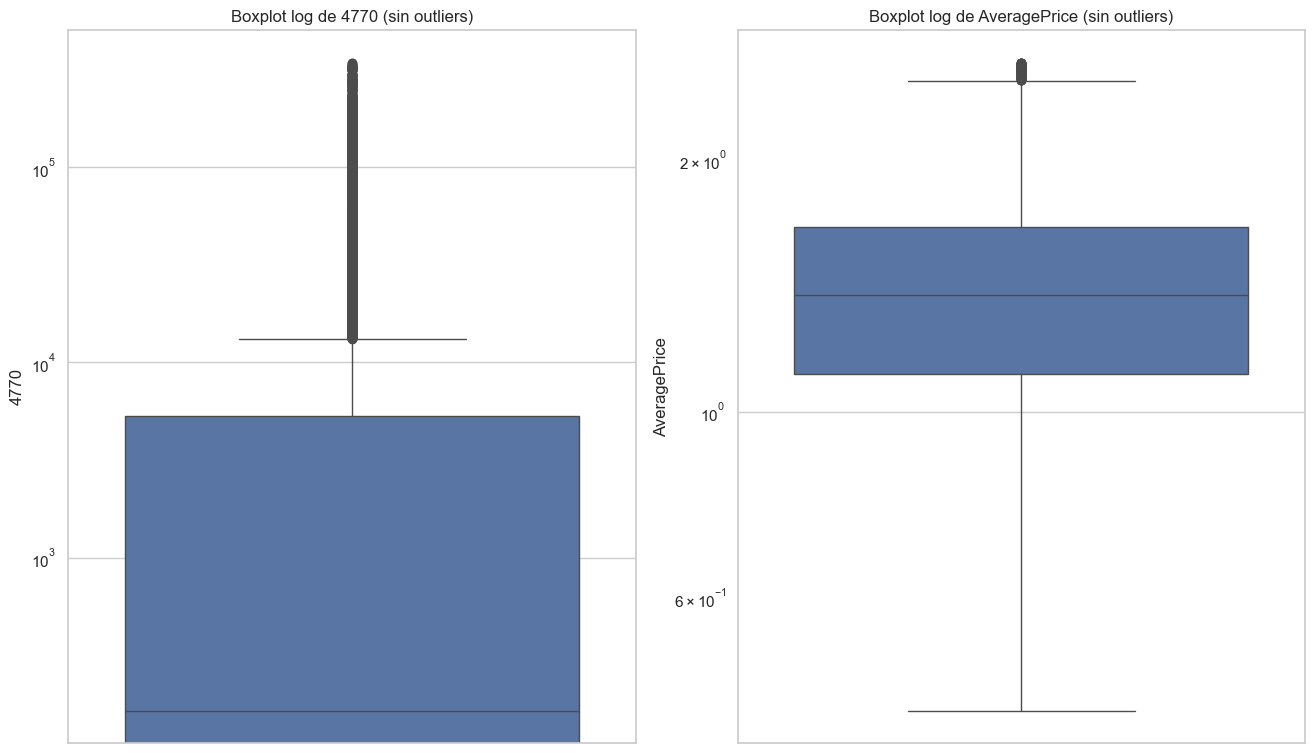

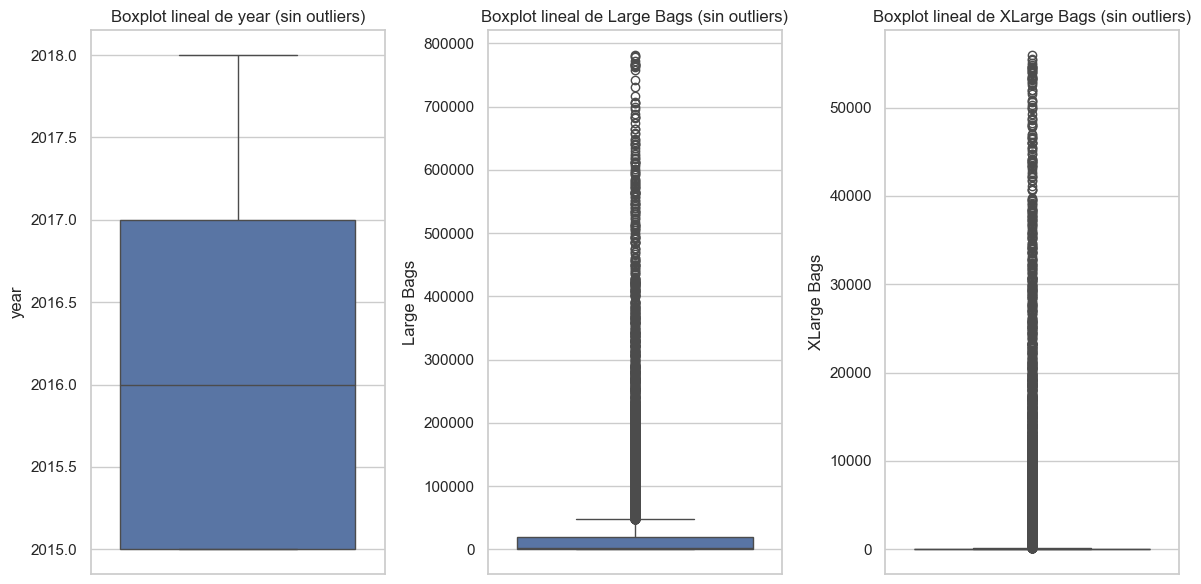

In [123]:
# Mismas columnas
col_log = ['4770', 'AveragePrice']
col_linear = ['year', 'Large Bags', 'XLarge Bags']

# Boxplots con escala logarítmica (después de limpiar)
plt.figure(figsize=(20, 15))
for i, col in enumerate(col_log, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_limpio, y=col)
    plt.yscale('log')
    plt.title(f'Boxplot log de {col} (sin outliers)')
plt.tight_layout()
plt.show()

# Boxplots con escala lineal (después de limpiar)
plt.figure(figsize=(20, 6))
for i, col in enumerate(col_linear, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(data=df_limpio, y=col)
    plt.title(f'Boxplot lineal de {col} (sin outliers)')
plt.tight_layout()
plt.show()


Aunque en el grafico es un poco dificil ver la diferencia debido a la escala de los mismos, se logra apreciar una pequeña diferencia entre el dataframe original y el limpio, siendo ese cambio significativo para el diseño de los modelos posteriormente

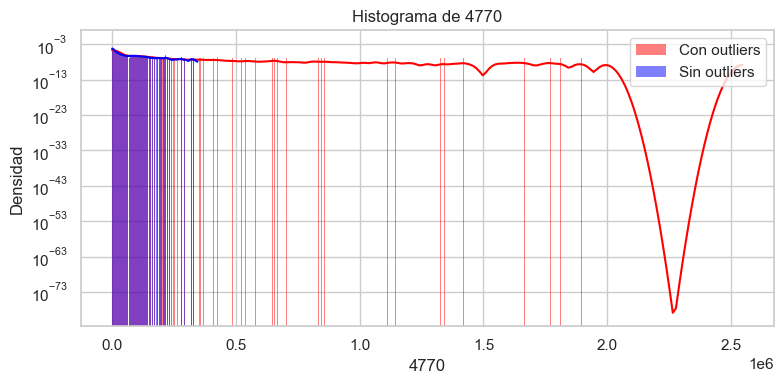

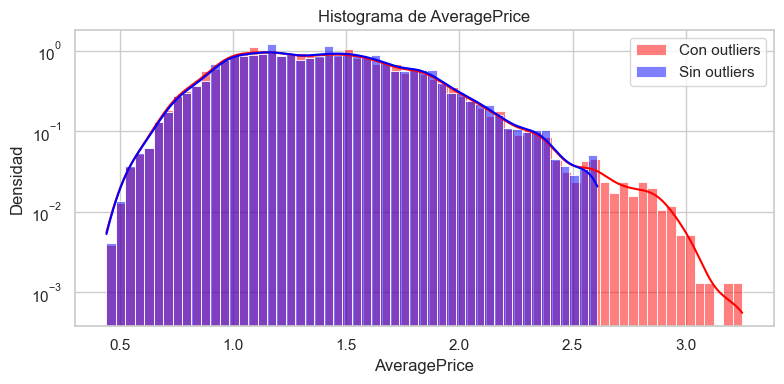

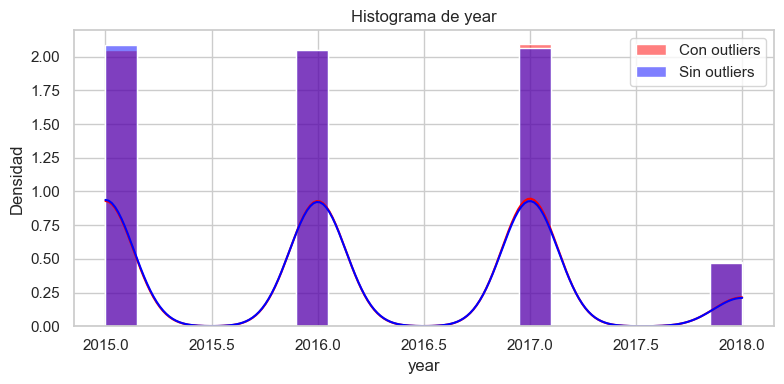

In [124]:

todas_las_columnas = col_log + col_linear
columnas_sin_bags = [col for col in todas_las_columnas if 'Bags' not in col]

for col in columnas_sin_bags:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], color='red', label='Con outliers', kde=True, stat="density", alpha=0.5)
    sns.histplot(df_limpio[col], color='blue', label='Sin outliers', kde=True, stat="density", alpha=0.5)
    plt.title(f'Histograma de {col}')
    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.ylabel('Densidad')

    # Escala logarítmica si era una de las columnas log
    if col in col_log:
        plt.yscale('log')

    plt.tight_layout()
    plt.show()


### **Análisis de Distribución con y sin Outliers**
A continuación se presentan los histogramas de densidad para algunas variables numéricas relevantes del conjunto de datos. En cada gráfico se comparan dos distribuciones:

**En rojo**: Distribución original con outliers.

**En azul**: Distribución después de eliminar los outliers mediante el método del rango intercuartílico (IQR).

Histogramas de variables seleccionadas  
  
**Total Volume**

La variable Total Volume presenta una alta concentración de valores bajos y una cola larga hacia valores extremos. Después de eliminar los outliers, la distribución se vuelve más concentrada y continua, lo que puede mejorar el rendimiento de modelos estadísticos o de aprendizaje automático.

**4046**

La variable 4046 muestra una distribución similar a la anterior, con una fuerte asimetría y presencia significativa de valores atípicos. La limpieza mejora la forma de la distribución, haciéndola más representativa del comportamiento central de los datos.

**4225**

En la variable 4225, se aprecia una reducción considerable en la densidad de los extremos tras remover los outliers, lo que permite visualizar mejor la estructura real de los datos sin distorsión.

**4770**

En este caso, la presencia de valores atípicos era tan marcada que afectaba visiblemente la escala. Al eliminarlos, la distribución se vuelve mucho más interpretable.

## Ahora vamos a estandarizar los datos usando **StandardScaler**

In [125]:
scaler = StandardScaler()
df_numericas_escaladas = pd.DataFrame(
    scaler.fit_transform(df_limpio),
    columns=df_limpio.columns,
    index=df_limpio.index
)

In [126]:
df_clean_standardized = df_numericas_escaladas.copy()

In [127]:
# Definir X (predictoras) y y (objetivo)
df_clean_standardized.head()

,AveragePrice,4770,4225,Large Bags,XLarge Bags,year,Small Bags,month,day
0,-0.194719,-0.322585,-0.278787,-0.380144,-0.259275,-1.20979,-0.401248,1.644908,1.289213
1,-0.142893,-0.322291,-0.303270,-0.380086,-0.259275,-1.20979,-0.397750,1.644908,0.491632
2,-1.231245,-0.320202,-0.142369,-0.380009,-0.259275,-1.20979,-0.403689,1.644908,-0.305948
3,-0.842548,-0.321879,-0.235086,-0.379590,-0.259275,-1.20979,-0.413971,1.644908,-1.103528
4,-0.324285,-0.321786,-0.305267,-0.378714,-0.259275,-1.20979,-0.412628,1.362403,1.517093


## MODELOS PREDICTIVOS

In [128]:
X = df_clean_standardized.drop(['AveragePrice'], axis=1)
y = df_clean_standardized['AveragePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### IMPLEMENTACIÓN DEL MODELO DE REGRESIÓN LINEAL PARA LA PREDICCIÓN DEL PRECIO DE LOS AGUACATES

Regresión Lineal - MSE: 0.8437082393114861
Regresión Lineal - R²: 0.13428349547732188


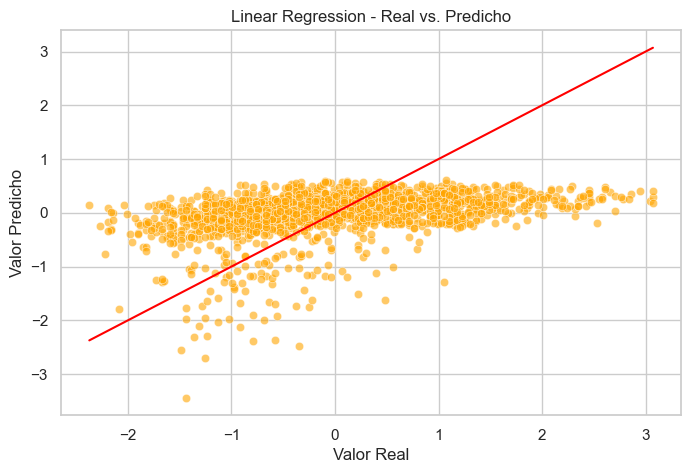

In [129]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Regresión Lineal - MSE:", mean_squared_error(y_test, y_pred_lr))
print("Regresión Lineal - R²:", r2_score(y_test, y_pred_lr))

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6, color='orange')
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.title("Linear Regression - Real vs. Predicho")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.grid(True)
plt.show()


### IMPLEMENTACIÓN DEL MODELO DE REGRESIÓN DE ARBOLES ALEATORIOS PARA LA PREDICCIÓN DEL PRECIO DE LOS AGUACATES

Random Forest - MSE: 0.18051337995727798
Random Forest - R²: 0.8147778994742108


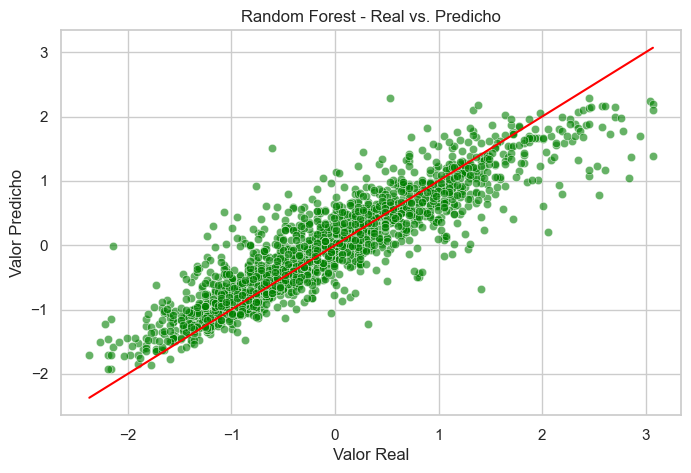

In [130]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    random_state=43
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest - MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest - R²:", r2_score(y_test, y_pred_rf))

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color='green')
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.title("Random Forest - Real vs. Predicho")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.grid(True)
plt.show()

### IMPLEMENTACIÓN DEL MODELO DE REDES NEURONALES PARA LA PREDICCIÓN DEL PRECIO DE LOS AGUACATES

Red Neuronal (MLP) - MSE: 0.3168117943001356
Red Neuronal (MLP) - R²: 0.6749241190569735


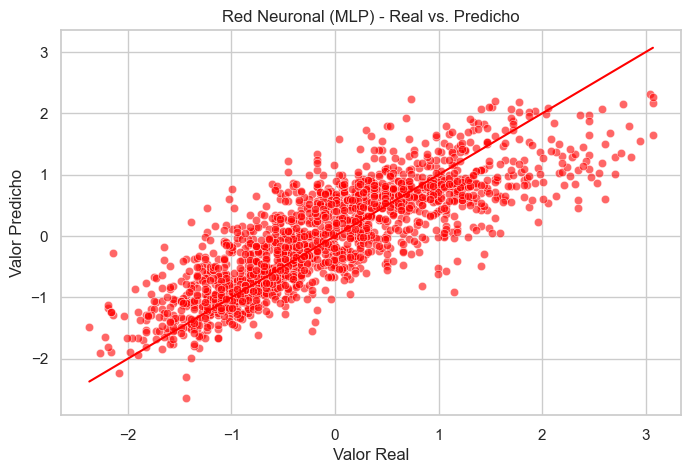

In [131]:
mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("Red Neuronal (MLP) - MSE:", mean_squared_error(y_test, y_pred_mlp))
print("Red Neuronal (MLP) - R²:", r2_score(y_test, y_pred_mlp))

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_mlp, alpha=0.6, color='red')
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.title("Red Neuronal (MLP) - Real vs. Predicho")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.grid(True)
plt.show()

### IMPLEMENTACIÓN DEL MODELO DE GRANDIENT BOOSTING PARA LA PREDICCIÓN DEL PRECIO DE LOS AGUACATES

Gradient Boosting - MSE: 0.1747121486347658
Gradient Boosting - R²: 0.8207304568494369


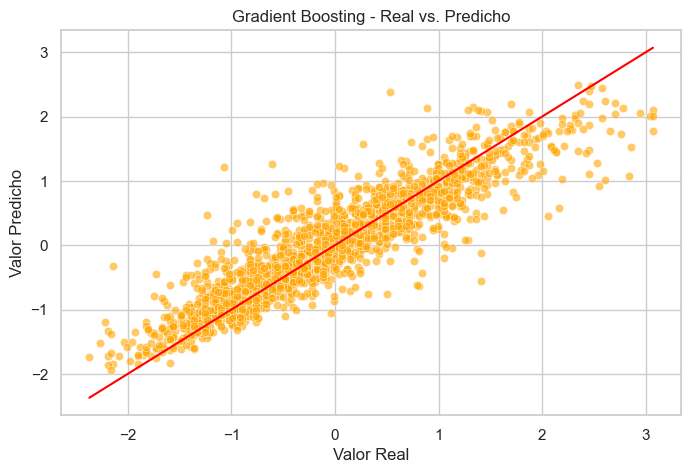

In [132]:
gb = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=10,
    random_state=42
)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting - MSE:", mean_squared_error(y_test, y_pred_gb))
print("Gradient Boosting - R²:", r2_score(y_test, y_pred_gb))

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_gb, alpha=0.6, color='orange')
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.title("Gradient Boosting - Real vs. Predicho")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.grid(True)
plt.show()

## Comparación de Modelos – MSE y R²

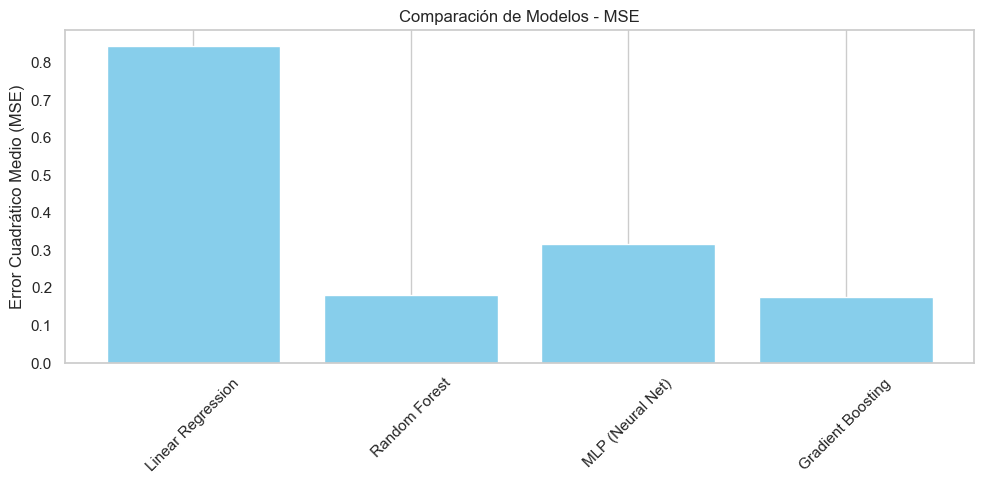

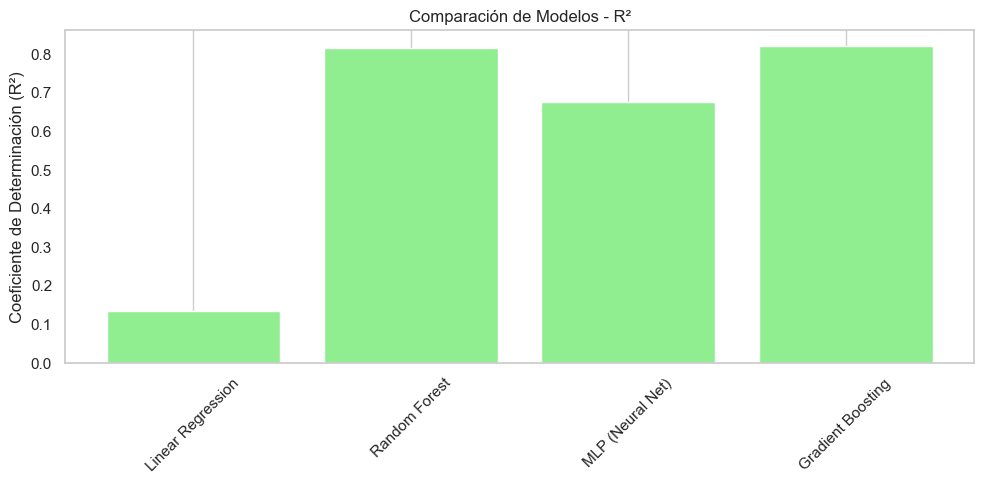

In [133]:
model_names = ['Linear Regression','Random Forest', 'MLP (Neural Net)', 'Gradient Boosting' ]
mse_values = [
    mean_squared_error(y_test, y_pred_lr),
    mean_squared_error(y_test, y_pred_rf),
    mean_squared_error(y_test, y_pred_mlp),
    mean_squared_error(y_test, y_pred_gb)
]
r2_values = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_rf),
    r2_score(y_test, y_pred_mlp),
    r2_score(y_test, y_pred_gb)
]

# Gráfico de barras para MSE
plt.figure(figsize=(10, 5))
plt.bar(model_names, mse_values, color='skyblue')
plt.title("Comparación de Modelos - MSE")
plt.ylabel("Error Cuadrático Medio (MSE)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Gráfico de barras para R²
plt.figure(figsize=(10, 5))
plt.bar(model_names, r2_values, color='lightgreen')
plt.title("Comparación de Modelos - R²")
plt.ylabel("Coeficiente de Determinación (R²)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
